In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
listings_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/listings.csv')
contacts_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/contacts.csv')
users_df = pd.read_csv('~/Downloads/2018 DA Take Home Challenge/users.csv')

In [3]:
combined_df =contacts_df.merge(listings_df, left_on ='id_listing_anon', right_on='id_listing_anon')

In [4]:
combined_df2 =combined_df.merge(users_df, left_on ='id_guest_anon', right_on='id_user_anon')

In [5]:
combined_df2.head(5)
combined_df3 = combined_df2.copy()

In [6]:
# combined_df3  = combined_df2.ts_booking_at.fillna(0)
combined_df3.ts_booking_at = combined_df3.ts_booking_at.fillna(0)

In [7]:
combined_df3.ts_booking_at = combined_df3.ts_booking_at.apply(lambda x: 0 if x==0 else 1)

In [ ]:
# combined_df3.guest_user_stage_first = combined_df3.guest_user_stage_first.apply(lambda x: 0 if x==0 else 1)

In [8]:
combined_df3.shape

(27979, 20)

In [9]:
combined_df3.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,6,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,14,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26


In [10]:
contact_me_df_nobook = combined_df3[combined_df3.ts_booking_at==0]
contact_me_df_book = combined_df3[combined_df3.ts_booking_at==1]

In [11]:
print(contact_me_df_book.m_guests.mean(), contact_me_df_book.m_guests.std())

2.4983631977946246 1.545105103340934


In [12]:
print(contact_me_df_nobook.m_guests.mean(), contact_me_df_nobook.m_guests.std())

2.9838729383017717 2.0404268750607972


In [13]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27979 entries, 0 to 27978
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         27979 non-null  object 
 1   id_host_anon                          27979 non-null  object 
 2   id_listing_anon                       27979 non-null  object 
 3   ts_interaction_first                  27979 non-null  object 
 4   ts_reply_at_first                     25935 non-null  object 
 5   ts_accepted_at_first                  16454 non-null  object 
 6   ts_booking_at                         27979 non-null  int64  
 7   ds_checkin_first                      27979 non-null  object 
 8   ds_checkout_first                     27979 non-null  object 
 9   m_guests                              27978 non-null  float64
 10  m_interactions                        27979 non-null  int64  
 11  m_first_message

In [14]:
# combined_df3.ts_interaction_first = pd.to_datetime(contact_me_df_nobook['ts_interaction_first'],infer_datetime_format=True)

In [15]:
combined_df3.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,6,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,14,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26


In [16]:
combined_df3['ts_interaction_first'].isnull().sum()

0

In [17]:
combined_df3.shape

(27979, 20)

In [18]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27979 entries, 0 to 27978
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         27979 non-null  object 
 1   id_host_anon                          27979 non-null  object 
 2   id_listing_anon                       27979 non-null  object 
 3   ts_interaction_first                  27979 non-null  object 
 4   ts_reply_at_first                     25935 non-null  object 
 5   ts_accepted_at_first                  16454 non-null  object 
 6   ts_booking_at                         27979 non-null  int64  
 7   ds_checkin_first                      27979 non-null  object 
 8   ds_checkout_first                     27979 non-null  object 
 9   m_guests                              27978 non-null  float64
 10  m_interactions                        27979 non-null  int64  
 11  m_first_message

In [19]:
combined_df3.listing_neighborhood.value_counts()

-unknown-          11876
Copacabana          6541
Ipanema             3003
Leblon              1024
Barra da Tijuca     1003
                   ...  
Vaz Lobo               1
Olaria                 1
Vigário Geral          1
Vila da Penha          1
Sampaio                1
Name: listing_neighborhood, Length: 68, dtype: int64

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from matplotlib import cm

In [24]:
combined_df3.head()
# combined_df3.shape

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,6,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,14,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26


In [30]:
print(f'm_guest:{combined_df3["m_guests"].isnull().sum()}')
print(f'm_interactions:{combined_df3["m_interactions"].isnull().sum()}')
print(f'm_first_message_length_in_characters:{combined_df3["m_first_message_length_in_characters"].isnull().sum()}')
print(f'total_reviews:{combined_df3["total_reviews"].isnull().sum()}')
print(f'words_in_user_profile:{combined_df3["words_in_user_profile"].isnull().sum()}')

m_guest:1
m_interactions:0
m_first_message_length_in_characters:0
total_reviews:0
words_in_user_profile:0


In [32]:
combined_df3["m_guests"].mode()

0    2.0
dtype: float64

In [33]:
combined_df3["m_guests"] = combined_df3["m_guests"].fillna(2)
# df['DataFrame Column'] = df['DataFrame Column'].fillna(0)

In [34]:
print(f'm_guest:{combined_df3["m_guests"].isnull().sum()}')

m_guest:0


In [43]:
print(f'm_first_message_length_in_characters:{combined_df3["m_first_message_length_in_characters"].isnull().sum()}')
print(f'm_first_message_length_in_characters:{combined_df3["m_first_message_length_in_characters"].describe()}')
print(f'm_first_message_length_in_characters:{combined_df3["m_first_message_length_in_characters"].info()}')


m_first_message_length_in_characters:0
m_first_message_length_in_characters:count    27979.000000
mean       193.743879
std        183.169421
min          0.000000
25%         66.000000
50%        154.000000
75%        269.000000
max       2341.000000
Name: m_first_message_length_in_characters, dtype: float64


AttributeError: 'Series' object has no attribute 'info'

In [45]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27979 entries, 0 to 27978
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         27979 non-null  object 
 1   id_host_anon                          27979 non-null  object 
 2   id_listing_anon                       27979 non-null  object 
 3   ts_interaction_first                  27979 non-null  object 
 4   ts_reply_at_first                     25935 non-null  object 
 5   ts_accepted_at_first                  16454 non-null  object 
 6   ts_booking_at                         27979 non-null  int64  
 7   ds_checkin_first                      27979 non-null  object 
 8   ds_checkout_first                     27979 non-null  object 
 9   m_guests                              27979 non-null  float64
 10  m_interactions                        27979 non-null  int64  
 11  m_first_message

In [47]:
kde_data = combined_df3[['m_guests', 'm_interactions', 'm_first_message_length_in_characters', 'total_reviews',
       'words_in_user_profile', 'ts_booking_at']]

Text(0.5, 0.91, 'KDE Plots for Numerical Predictors')

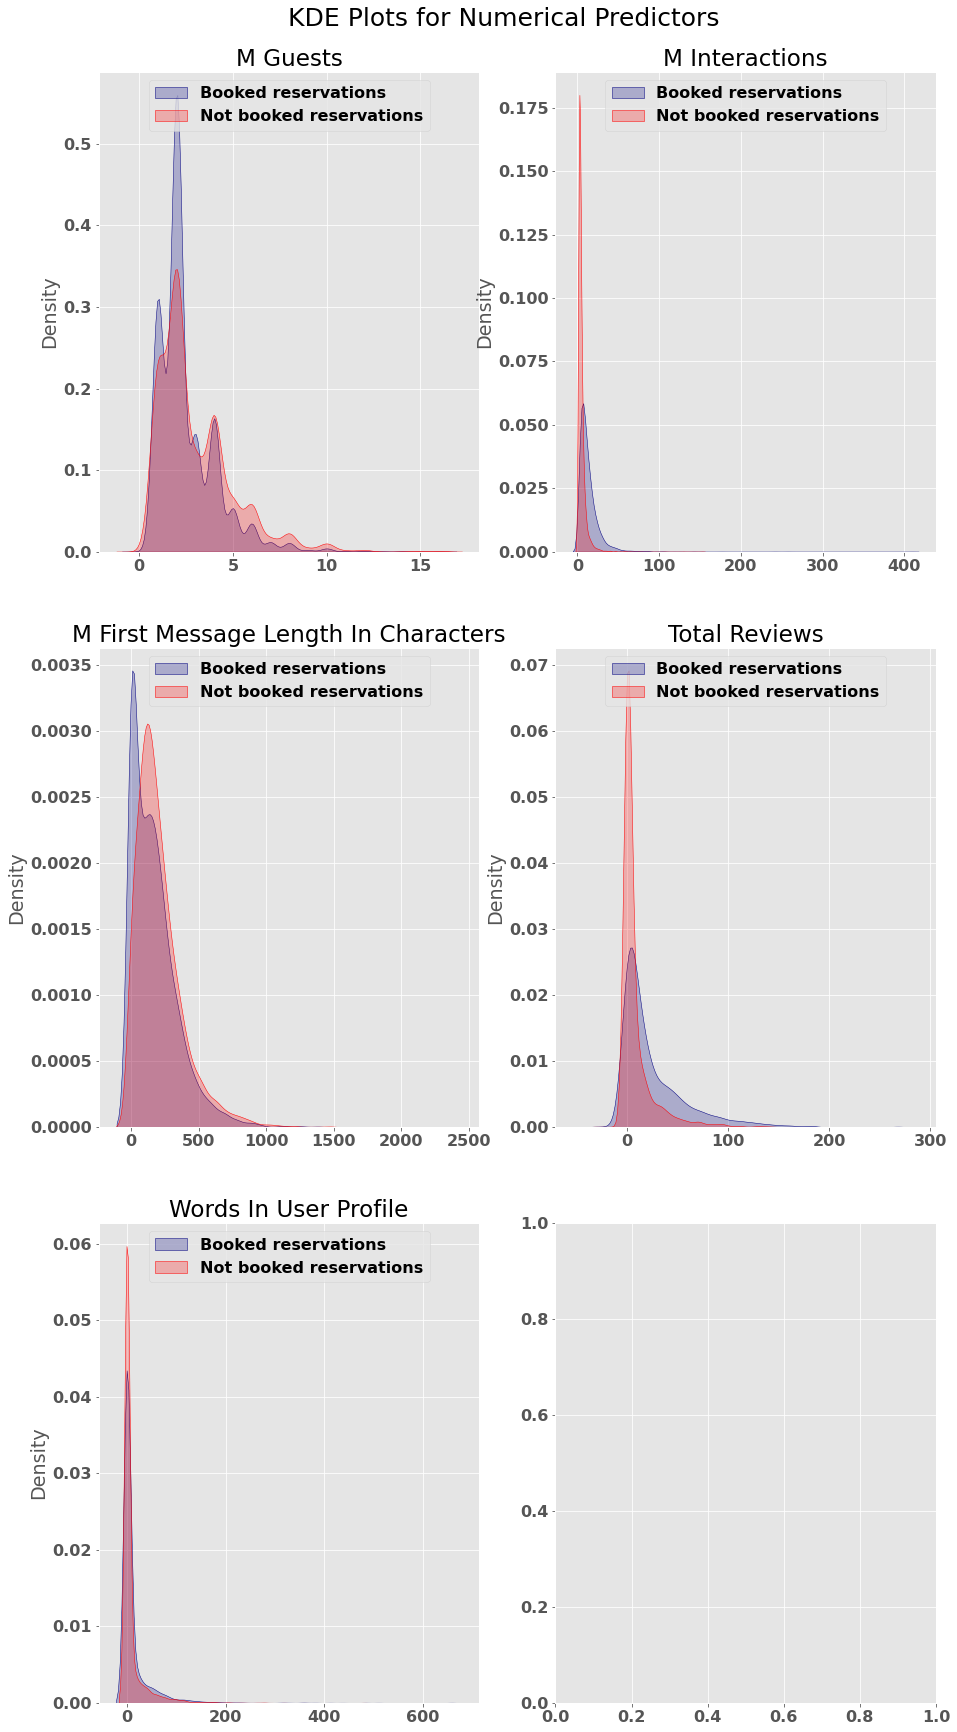

In [61]:
kde_cols = kde_data.iloc[:,:5].columns.to_list()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,30))

for col, ax in zip(kde_cols[:8], axs.flatten()):
    
    booked = kde_data[kde_data.ts_booking_at == 1]
    unbooked = kde_data[kde_data.ts_booking_at == 0]

    sbn.kdeplot(booked[col], fill=True, bw_method=0.2, color='#000080', label='Booked reservations', ax=ax)
    sbn.kdeplot(unbooked[col], fill=True, bw_method=0.2, color='#FF0000', label='Not booked reservations', ax=ax)
    ax.set_xlabel('')
    ax.set_title(col.replace('_', ' ').title())
#     ax.set_title(col.replace('M', '').title())
    _ = ax.legend(loc='upper center')
    
plt.suptitle("KDE Plots for Numerical Predictors",y=0.91, fontsize=25)

In [62]:
# cat_data = combined_df3[['guest_user_stage_first', 'room_type', 'listing_neighborhood','country', 'ts_booking_at']]
# cat_cols = cat_data.iloc[:,:4].columns.to_list()
# group_data = cat_data.groupby([col,'ts_booking_at']).size().unstack()
# group_data.columns = ['Active Riders', 'Churned Riders']
# group_data.plot.bar(stacked=True, color=['#619CFF', '#F8766D'])

KeyError: 'words_in_user_profile'

In [64]:
combined_df3['booked'] = combined_df3.ts_booking_at.apply(lambda x: True if x == 1 else False)

In [66]:
# group_data

NameError: name 'group_data' is not defined

<AxesSubplot:xlabel='guest_user_stage_first'>

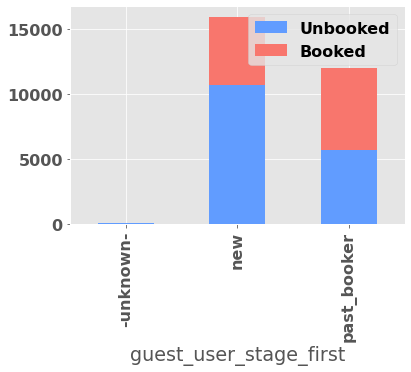

In [68]:
# cat_data = combined_df3[['guest_user_stage_first', 'room_type', 'listing_neighborhood','country', 'booked']]
# cat_cols = cat_data.iloc[:,:4].columns.to_list()
# group_data = cat_data.groupby([col,'booked']).size().unstack()
# group_data.columns = ['Unbooked', 'Booked']
# group_data.plot.bar(stacked=True, color=['#619CFF', '#F8766D'])

In [65]:
combined_df3.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile,booked
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,...,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0,True
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,...,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,...,164.0,contact_me,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,...,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False


In [74]:
# combined_df3["guest_user_stage_first"] = combined_df3["guest_user_stage_first"].fillna('new')
# combined_df3["guest_user_stage_first"].mode()
#  df['Cloud_numerical'].replace(d1, inplace= True)

d1 =  {
    '-unknown-':'new'}
combined_df3['guest_user_stage_first'].replace(d1, inplace= True)


In [77]:
combined_df3["guest_user_stage_first"].value_counts()

new            15982
past_booker    11997
Name: guest_user_stage_first, dtype: int64

<AxesSubplot:xlabel='listing_neighborhood'>

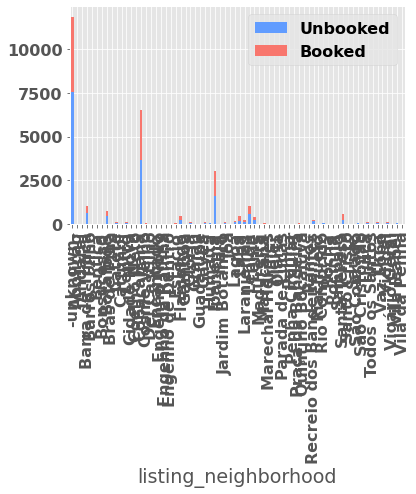

In [78]:
cat_data = combined_df3[['guest_user_stage_first', 'room_type', 'listing_neighborhood','country', 'booked']]
cat_cols = cat_data.iloc[:,:4].columns.to_list()
group_data = cat_data.groupby([col,'booked']).size().unstack()
group_data.columns = ['Unbooked', 'Booked']
group_data.plot.bar(stacked=True, color=['#619CFF', '#F8766D'])

Text(0.5, 0.91, 'Stacked Barcharts for Categorical Predictors')

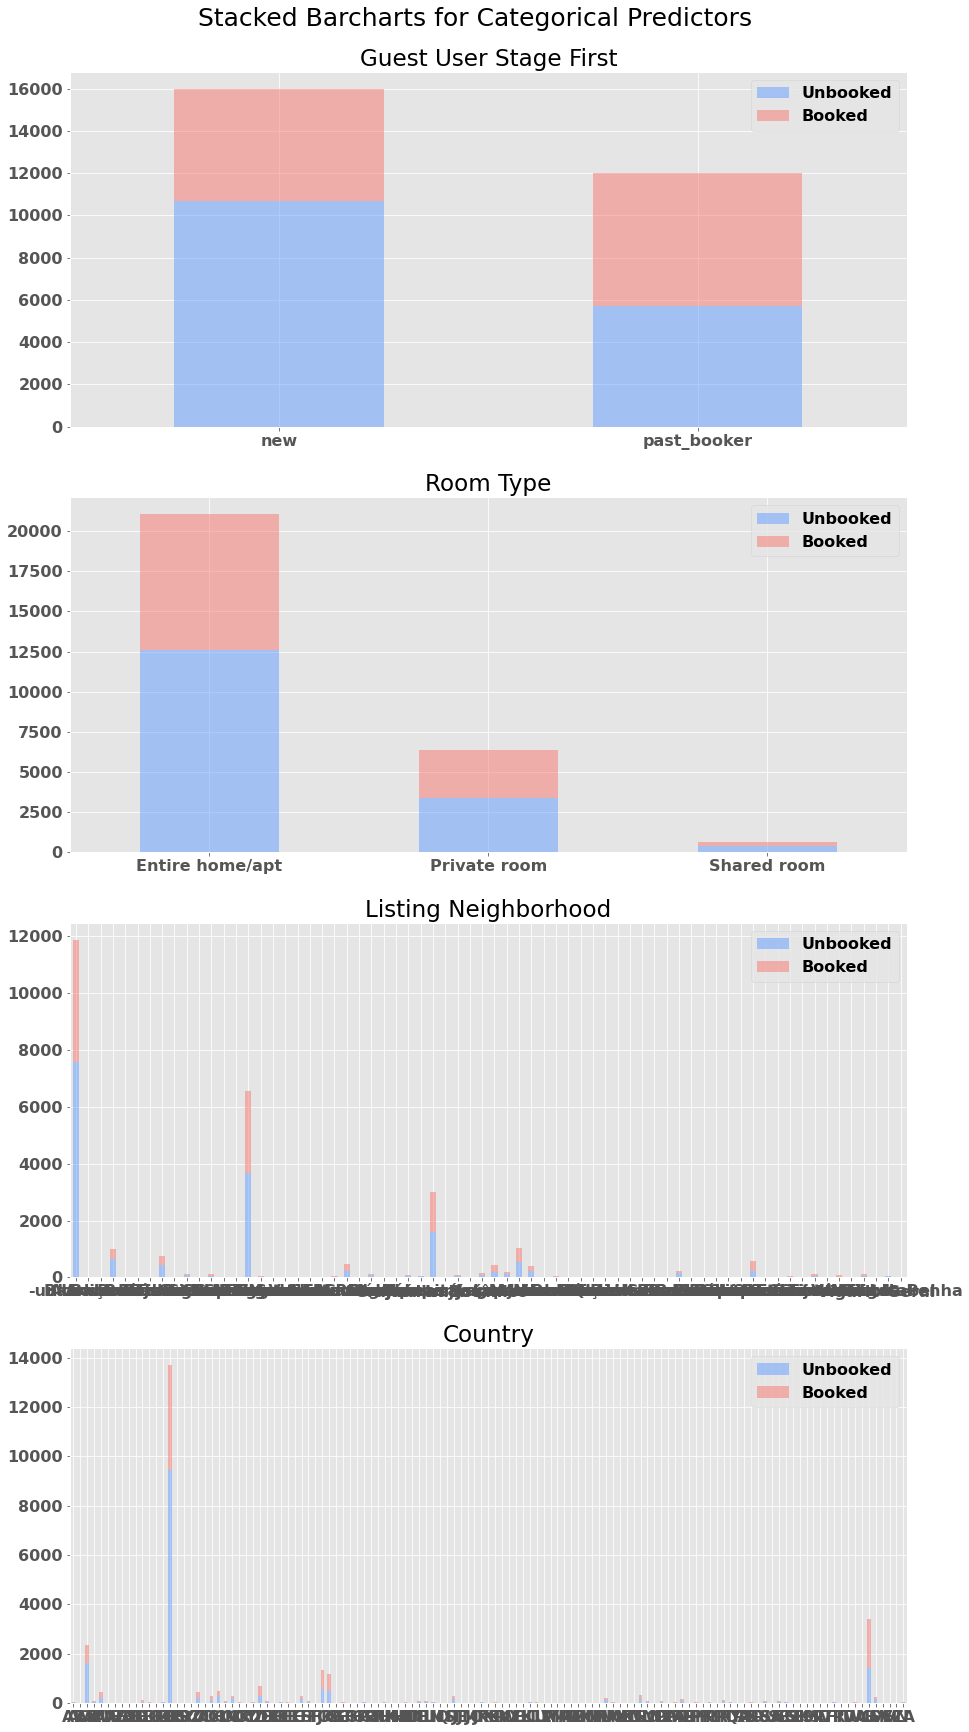

In [80]:


fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,30))

# date_format = mdates.DateFormatter('%B-%d')

for col, ax in zip(cat_cols[:4], axs.flatten()):
    group_data = cat_data.groupby([col,'booked']).size().unstack()
    group_data.columns = ['Unbooked', 'Booked']
    group_data.plot.bar(stacked=True, ax=ax, color=['#619CFF', '#F8766D'], alpha = 0.5)
    if col == 'signup_date':
        ax.xaxis.set_major_formatter(date_format)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode="anchor")
    else:
        ax.tick_params(labelrotation=0)
    ax.set_xlabel("")
    ax.set_title(col.replace('_', ' ').title())
    _ = ax.legend(loc='best')

plt.suptitle("Stacked Barcharts for Categorical Predictors",y=0.91, fontsize=25) 

In [81]:
combined_df3.listing_neighborhood.value_counts()

-unknown-          11876
Copacabana          6541
Ipanema             3003
Leblon              1024
Barra da Tijuca     1003
                   ...  
Vaz Lobo               1
Olaria                 1
Vigário Geral          1
Vila da Penha          1
Sampaio                1
Name: listing_neighborhood, Length: 68, dtype: int64

In [83]:
combined_df3.room_type.value_counts()

Entire home/apt    21056
Private room        6331
Shared room          592
Name: room_type, dtype: int64